In [1]:
import cv2
import numpy as np

In [2]:
image = cv2.imread('image.jpg')

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [5]:
from sklearn.cluster import KMeans

In [6]:
classifier = KMeans(n_clusters = 3, n_jobs=4)
classifier.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
labels = classifier.labels_

In [8]:
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [9]:
label = [0] * 3
label

[0, 0, 0]

In [10]:
for i in labels:
    label[i] += 1
label    

[366816, 193957, 58155]

In [15]:
a = label[0]/sum(label)*100
b = label[1]/sum(label)*100
c = label[2]/sum(label)*100

In [16]:
a,b,c

(59.2663443890081, 31.337570767520617, 9.396084843471291)

In [17]:
color = classifier.cluster_centers_

In [18]:
color

array([[ 22.43891488,  21.90808471,  20.96797304],
       [254.18388612, 254.18080296, 254.17905   ],
       [177.66257416, 155.04429542,  90.56063967]])

In [19]:
color = [ [int(x) for x in c ] for c in color]

In [20]:
color

[[22, 21, 20], [254, 254, 254], [177, 155, 90]]

In [23]:
import webcolors

In [24]:
color = [webcolors.rgb_to_hex(x) for x in color]

In [25]:
import matplotlib.pyplot as plt

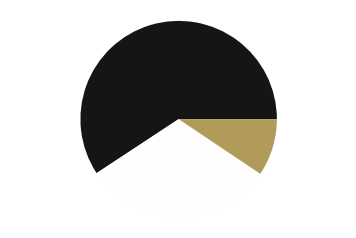

In [26]:
plt.pie(label, colors = color)
plt.axis('equal')
plt.show()

## Importing All images

In [127]:
k = 3
image = []
colorTriple = []
color = []
label = []
for i in range(10):
    name = 'Dominant Color Data Set/image '+ str(i+1) +'.jpg'
    image.append(cv2.imread(name))
    image[i] = cv2.cvtColor(image[i], cv2.COLOR_BGR2RGB)
    image[i] = image[i].reshape((image[i].shape[0] * image[i].shape[1]), 3)
    clf = KMeans(n_clusters = k, n_jobs=4)
    clf.fit(image[i])
    labels = clf.labels_
    label.append([0] * k)
    for x in labels: label[i][x] += 1
    label[i] = [float(x)/ sum(label[i]) * 100 for x in label[i]]
    color.append(clf.cluster_centers_)
    color[i] = [[int(j) for j in x] for x in color[i]]
    colorTriple.append(color[i])
    color[i] = [webcolors.rgb_to_hex(x) for x in color[i]]

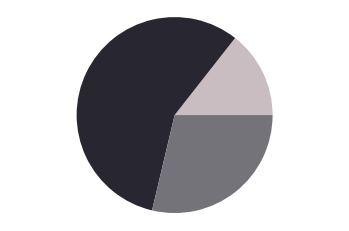

In [128]:
plt.pie(label[7], colors = color[7])
plt.axis('equal')
plt.show()

In [129]:
color

[['#a6595c', '#d9d4d1', '#30325b'],
 ['#2f3022', '#d6cbc7', '#71634e'],
 ['#fbfaf8', '#5c4c47', '#d8b59c'],
 ['#8c8688', '#261b20', '#6b484e'],
 ['#322b2c', '#fbfbfa', '#c1a093'],
 ['#f0efee', '#12162d', '#c18f78'],
 ['#edeaeb', '#1f1f1b', '#d0a07f'],
 ['#c9bdc1', '#282731', '#74737a'],
 ['#2c2d40', '#f0f0ef', '#c4afaa'],
 ['#9a9192', '#852e34', '#471215']]

In [130]:
colort = [j for i in colorTriple for j in i]
colort

[[166, 89, 92],
 [217, 212, 209],
 [48, 50, 91],
 [47, 48, 34],
 [214, 203, 199],
 [113, 99, 78],
 [251, 250, 248],
 [92, 76, 71],
 [216, 181, 156],
 [140, 134, 136],
 [38, 27, 32],
 [107, 72, 78],
 [50, 43, 44],
 [251, 251, 250],
 [193, 160, 147],
 [240, 239, 238],
 [18, 22, 45],
 [193, 143, 120],
 [237, 234, 235],
 [31, 31, 27],
 [208, 160, 127],
 [201, 189, 193],
 [40, 39, 49],
 [116, 115, 122],
 [44, 45, 64],
 [240, 240, 239],
 [196, 175, 170],
 [154, 145, 146],
 [133, 46, 52],
 [71, 18, 21]]

In [131]:
label = [j for i in label for j in i]
label

[23.236002604166668,
 29.575195312500004,
 47.18880208333333,
 57.986328125,
 27.4091796875,
 14.604492187500002,
 67.9765625,
 15.201497395833332,
 16.821940104166664,
 63.125651041666664,
 21.927734375,
 14.946614583333334,
 31.134440104166668,
 59.257486979166664,
 9.608072916666668,
 71.48567708333333,
 23.813151041666668,
 4.701171875,
 65.16243489583333,
 25.804361979166668,
 9.033203125,
 14.411458333333332,
 56.88964843749999,
 28.698893229166668,
 58.61067708333333,
 32.0712890625,
 9.318033854166668,
 21.621419270833332,
 48.77571614583333,
 29.602864583333332]

## Base Colors

In [132]:
colors = [['Black', [0,0,0]],
 ['Blue', [0,0,255]],
 ['Brown', [165,42,42]],    
 ['Cream', [255,255,204]],   
 ['Green',  [0,128,0]],        
 ['Grey',   [128,128,128]],
 ['Yellow', [255,255,0]],
 ['Orange', [255,165,0]],          
 ['Pink', [255,192,203]], 
 ['Red', [255,0,0]],  
 ['Purple', [128,0,128]],
 ['Tan', [210,180,140]],
 ['Turquoise', [64,224,208]],
 ['White', [255,255,255]]]

In [133]:
import math
cols = []
for i in colort:
    dist = 999
    color = ''
    for j in colors:
        val = math.sqrt((j[1][0]-i[0])**2+(j[1][1]-i[1])**2+(j[1][2]-i[2])**2)
        if val < dist:
            dist = val
            color = j[0]
    cols.append(color)
cols

['Grey',
 'Pink',
 'Purple',
 'Black',
 'Pink',
 'Grey',
 'White',
 'Grey',
 'Tan',
 'Grey',
 'Black',
 'Brown',
 'Black',
 'White',
 'Tan',
 'White',
 'Black',
 'Tan',
 'White',
 'Black',
 'Tan',
 'Tan',
 'Black',
 'Grey',
 'Black',
 'White',
 'Tan',
 'Grey',
 'Brown',
 'Black']

In [134]:
color_total = {}
for i, val in enumerate(cols):
    if val not in color_total:
        color_total[val] = 0
    color_total[val] += label[i]
for i in color_total:
    color_total[i] /= 10
color_total

{'Black': 30.576920572916663,
 'Brown': 6.372233072916666,
 'Grey': 16.648795572916665,
 'Pink': 5.6984375,
 'Purple': 4.718880208333333,
 'Tan': 6.389388020833333,
 'White': 29.59534505208333}

In [135]:
%matplotlib inline
import seaborn as sns
sns.set()

In [136]:
x = [i for i in color_total]
y = [color_total[i] for i in x]

### ploting %tage

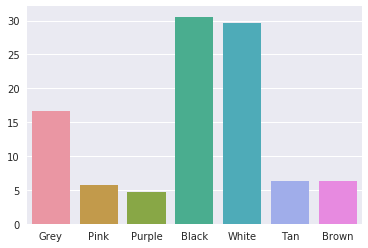

In [137]:
sns.barplot(x, y)